In [5]:
import numpy as np
import scipy
from scipy.sparse import diags, kron, eye
from scipy.sparse.linalg import spsolve


# Problem 1

In [123]:
import numpy as np
N  = 100
xx = np.linspace(0,1,N)
yy = xx
dx = xx[1] - xx[0]
dy = dx
epsilon = dx
dt = .01

In [124]:
def create_1d_laplacian(n):
    """Creates a 1D Laplacian matrix of size n x n."""
    e = np.ones(n)
    diagonals = [-2 * e, e, e]
    laplacian_1d = diags(diagonals, [0, -1, 1], shape=(n, n))
    return laplacian_1d

def create_2d_laplacian(n,h):
    """Creates a sparse 2D Laplacian matrix using Kronecker product."""
    laplacian_1d = create_1d_laplacian(n)
    identity = eye(n)
    
    # Use Kronecker product to create the 2D Laplacian
    laplacian_2d = kron(laplacian_1d, identity) + kron(identity, laplacian_1d)
    return laplacian_2d/(h**2)

In [125]:
def circular_u0(N,filled,randomized = True):
    if randomized:
        U_0 = np.random.random((N,N))-.5
    else:
        U_0 = np.zeros((N,N))
    if filled:
        for i in range(N):
            for j in range(N):
                if np.dot([i/N-.5,j/N-.5],[i/N-.5,j/N-.5]) < .1:
                    U_0[i,j] = 1
    else:
        theta = np.linspace(0,2*np.pi,N*2)
        for th in theta:
            x,y = .3*np.sin(th)+.5,.3*np.cos(th)+.5
            x = int(np.round(x*N))
            y = int(np.round(y*N))
            U_0[x,y] = 1
    return(U_0)

def tictactoe_u0(N,randomized=True):
    if randomized:
        U_0 = np.random.random((N,N))-.5
    else:
        U_0 = np.zeros((N,N))
    U_0[2*N//3,:] = 1    
    U_0[N//3,:] = 1    
    U_0[:,2*N//3] = 1
    U_0[:,N//3] = 1
    return U_0

In [126]:
np.random.seed(55)
U0 = np.random.random((N,N))
# U0 = circular_u0(N,False,True)
# U0 = tictactoe_u0(N)
U0 = U0 - np.mean(U0)
lap = create_2d_laplacian(N,dx)
# f_prime = lambda x: x**3 - x
u0_flat=U0.reshape(-1,1).flatten()

In [127]:
def forward_euler_step(u,lap,ft,t,step):
    F = ft(t)
    dudt = (lap @ u) + F
    return u + dudt*step

In [128]:
def backward_euler_step(u,lap,step):
    return   u+ step*spsolve(lap, u)



In [129]:
f = lambda u,dt : np.sign(u)*np.abs(u)*np.exp(dt)/(np.sqrt(1+u**2*(np.exp(2*dt)-1)))

In [130]:
def run_forward_method(u,f,lap,t0,tend,step):
    t = t0

    ls = list()
    ls.append(u)
    lst = list()
    lst.append(t)
    num_steps = int((tend-t0)//step)
    last_step = tend - num_steps*step - t0
    elap = epsilon**2*lap
    solve1 = -1/step*eye(len(u))+epsilon**2*lap
    for _ in range(num_steps):
        u_star = spsolve(solve1,-1*u/step)
        u = f(u_star,step)
        assert(np.mean(np.sign(u)==np.sign(u_star))==1)
        t+= step
        ls.append(u)
        lst.append(t)
        # print(u_star,u)
    

    u_star = spsolve(solve1,-1*u/step)
    u = f(u_star,step)
    ls.append(u)
    t+= last_step
    lst.append(t)
    return(ls,lst)

In [131]:
uu,tt = run_forward_method(u0_flat,f,lap,0,50,dt)

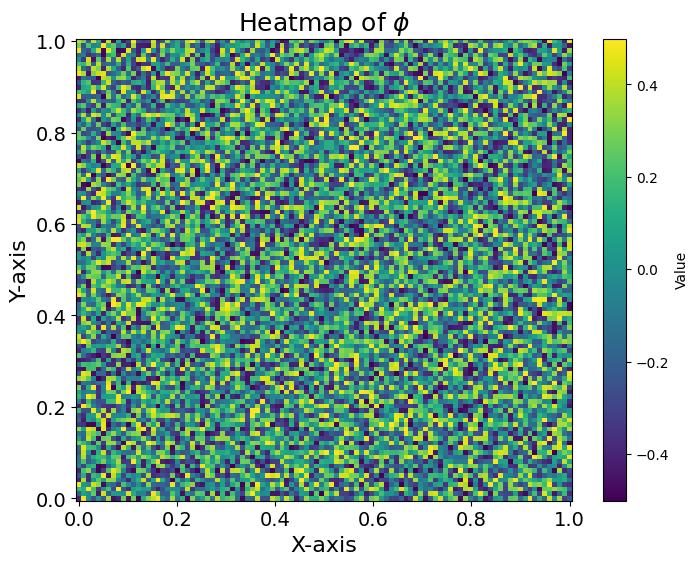

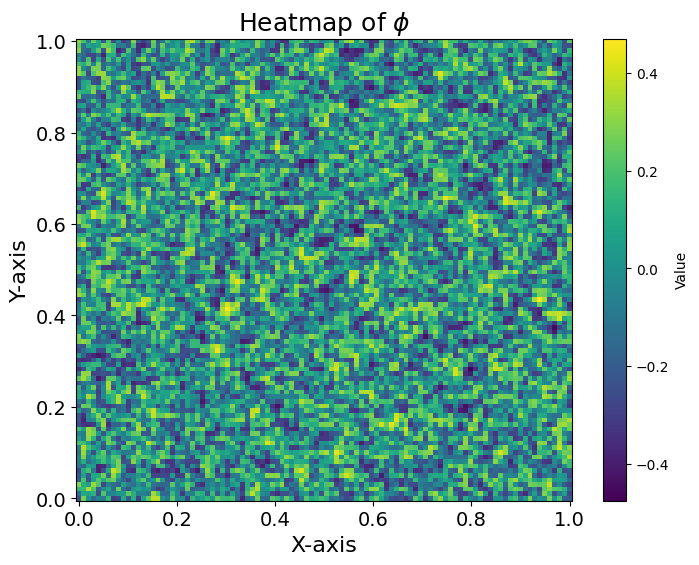

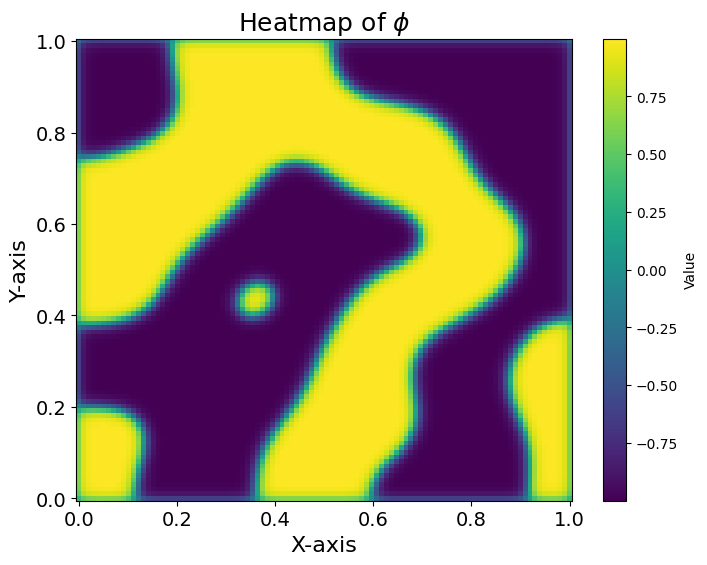

In [132]:
import matplotlib.pyplot as plt
import numpy as np

# Sample data for demonstration
# x, y = 1D arrays for axis values
# U = 2D array with values

for i in [0,15,-1]:
    U = uu[i].reshape(N,N)

    plt.figure(figsize=(8, 6))
    plt.pcolormesh(xx, yy, U, shading='auto', cmap='viridis')  # Shading 'auto' prevents visual artifacts
    plt.colorbar(label='Value')  # Add a color bar to show value scale
    plt.xlabel('X-axis',fontsize = 16)
    plt.ylabel('Y-axis',fontsize=16)
    plt.tick_params(axis='both', which='major', labelsize=14)
    plt.title(r'Heatmap of $\phi$',fontsize = 18)
    plt.show()



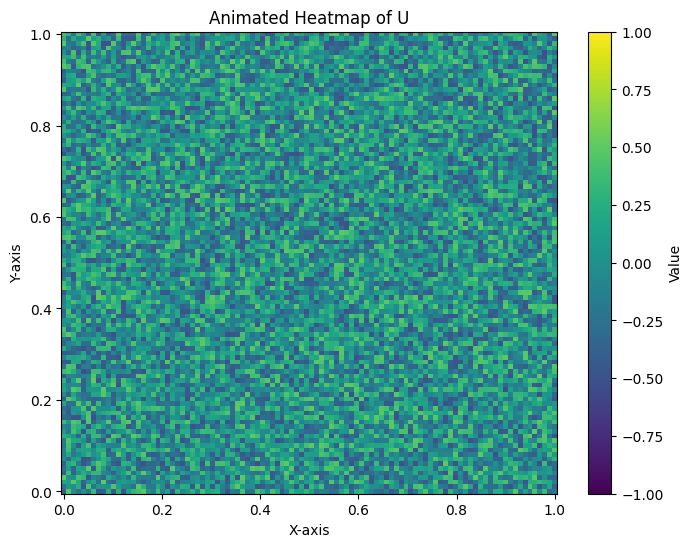

In [120]:
# Sample grid and initial data
import matplotlib.animation as animation

XX, YY = np.meshgrid(xx, yy)

# Generate random data for demonstration
# Replace this with your actual data generation or loading
astep = len(uu)//30
fig, ax = plt.subplots(figsize=(8, 6))
cax = ax.pcolormesh(XX.reshape(N,N), YY.reshape(N,N), uu[0].reshape(N,N), shading='auto', cmap='viridis', vmin = -1, vmax = 1)
fig.colorbar(cax, ax=ax, label='Value')
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.title('Animated Heatmap of U')

# Function to update the plot at each frame
def animate(i):
    cax.set_array(uu[i*astep].ravel())  # Update the array for the current frame

# Create the animation
ani = animation.FuncAnimation(fig, animate, frames=30, interval=100)  # Adjust interval for speed

# Save the animation as a video file (e.g., mp4) or display as a GIF
# ani.save('animated_heatmap.mp4', writer='ffmpeg', dpi=300)  # Save as MP4
# or display inline if using Jupyter Notebook
plt.show()
ani.save('animated_heatmap.gif', writer='pillow', dpi=80)


[6.705969090685571e-18, 0.001635965490574874, 0.013884753052804386, 0.011011581290454523, 0.0015683705014538298, -0.00417452897748349, -0.008118453471844481, -0.012575189752818523, -0.014556881265459476, -0.016571124323144597, -0.018229578111454973, -0.019788168819871714, -0.02086300050540738, -0.0217449107920852, -0.022999100632298836, -0.024350161398934592, -0.0254557120844362, -0.02640277607276525, -0.02795261527693535, -0.030463338533831368, -0.032402576391800914, -0.034154408404878316, -0.03657228828063899, -0.03955283588572624, -0.04268001141052178, -0.04575552008521019, -0.04853924068274994]
27


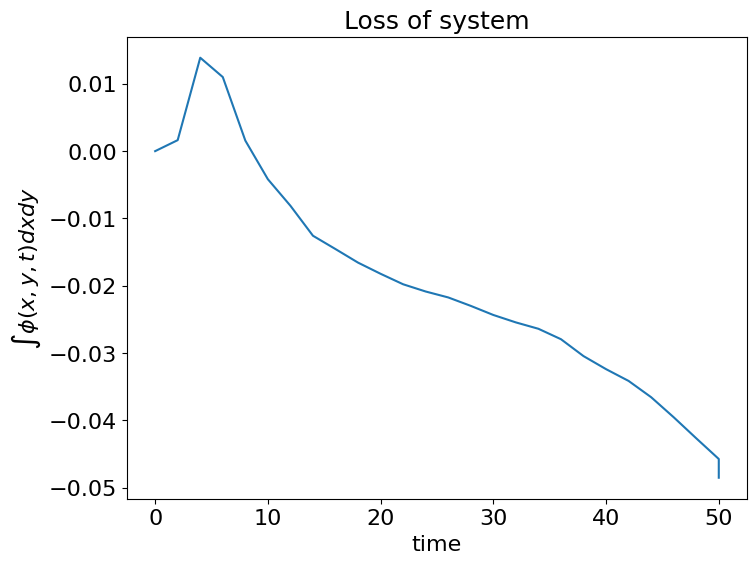

In [121]:
mass = [np.sum(uu[i])*dx*dy for i in range(len(uu))]
print(mass)
print(len(uu))
fig,ax = plt.subplots(figsize=(8, 6))
plt.plot(tt,mass)
ax.set_title('Loss of system',fontsize=18)
ax.set_xlabel('time',fontsize=16)
ax.set_ylabel(r'$\int \phi(x,y,t) dxdy$',fontsize=16)
ax.tick_params(axis='both', which='major', labelsize=16)

# Problem 2

In [156]:
import numpy as np
N  = 100
xx = np.linspace(0,1,N)
yy = xx
dx = xx[1] - xx[0]
dy = dx
epsilon = dx
dt = .1

In [157]:
def create_1d_laplacian(n):
    """Creates a 1D Laplacian matrix of size n x n."""
    e = np.ones(n)
    diagonals = [-2 * e, e, e]
    laplacian_1d = diags(diagonals, [0, -1, 1], shape=(n, n))
    return laplacian_1d

def create_2d_laplacian(n,h):
    """Creates a sparse 2D Laplacian matrix using Kronecker product."""
    laplacian_1d = create_1d_laplacian(n)
    identity = eye(n)
    
    # Use Kronecker product to create the 2D Laplacian
    laplacian_2d = kron(laplacian_1d, identity) + kron(identity, laplacian_1d)
    return laplacian_2d/(h**2)

In [158]:
np.random.seed(69420)
U0 = np.random.random((N,N))
U0 = np.full((N,N),.0 )
U0[:N//4,:N//4]  = -.5
U0[N//4:,N//4:]  = .5
U0 = U0 - np.mean(U0)

U0 = np.random.random((N,N))
# U0 = tictactoe_u0(N,True)
U0 = U0 - np.mean(U0)

# U0 = tictactoe_u0(N)
lap = create_2d_laplacian(N,dx)
f_prime = lambda x: x**3 - x
u0_flat=U0.reshape(-1,1).flatten()

In [159]:
def forward_euler_step(u,lap,ft,t,step):
    F = ft(t)
    dudt = (lap @ u) + F
    return u + dudt*step

In [160]:
def backward_euler_step(u,lap,step):
    return   u+ step*spsolve(lap, u)



In [161]:
phi_star = lambda u,dt : np.sign(u)*np.abs(u)*np.exp(dt)/(np.sqrt(1+u**2*(np.exp(2*dt)-1)))
F = lambda phi : (phi**2-1)**2/4
F_prime = lambda phi: phi**3 - phi
beta = lambda phi_ss, phi_0 : sum(phi_0 - phi_ss)/sum(np.sqrt(F(phi_ss))) * 1/dt
phi_ss = lambda phi_ss, phi_0 : phi_ss + dt*beta(phi_ss,phi_0)*np.sqrt(F(phi_ss))

In [162]:
def run_forward_method(u,f,lap,t0,tend,step):
    t = t0
    u0 = u
    ls = list()
    ls.append(u)
    lst = list()
    lst.append(t)
    num_steps = int((tend-t0)//step)
    last_step = tend - num_steps*step - t0
    solve1 = -1/step*eye(len(u))+epsilon**2*lap
    for _ in range(num_steps):
        u_star = spsolve(solve1,-1*u/step)
        u_ss = f(u_star,step)
        u = phi_ss(u_ss,u0)
        t+= step
        ls.append(u)
        lst.append(t)
        # print(u_star,u)
    

    u_star = spsolve(solve1,-1*u/step)
    u_ss = f(u_star,step)
    u = phi_ss(u_ss,u0)

    ls.append(u)
    t+= last_step
    lst.append(t)
    return(ls,lst)

In [163]:
uu,tt = run_forward_method(u0_flat,f,lap,0,50,dt)

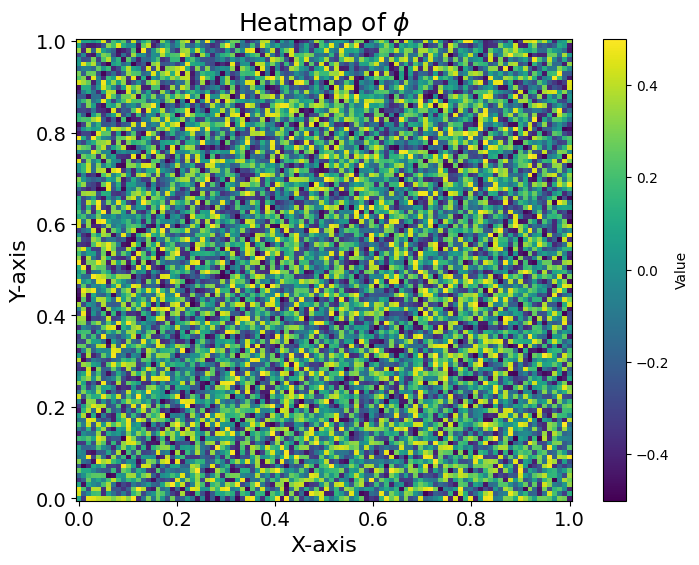

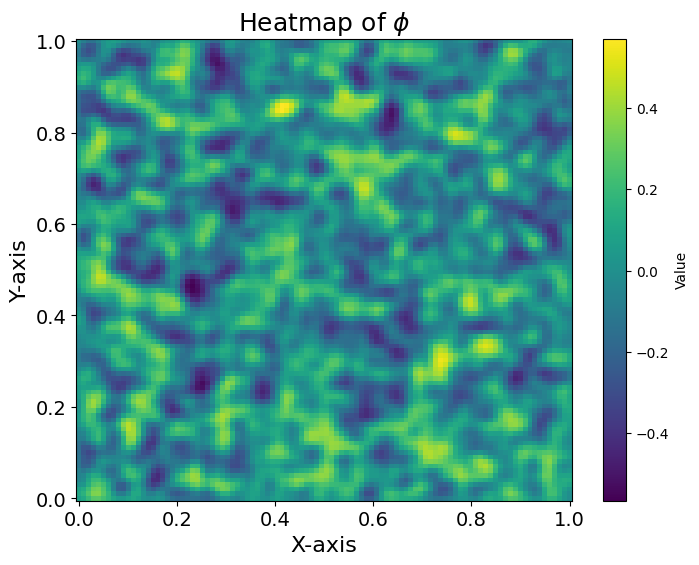

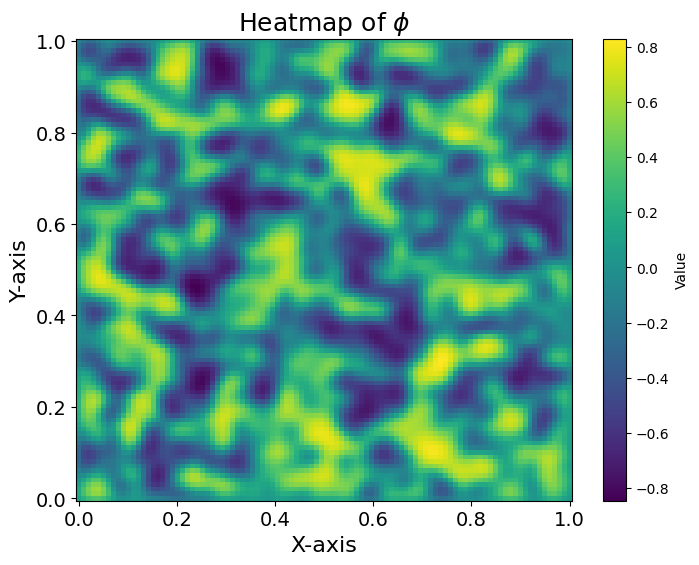

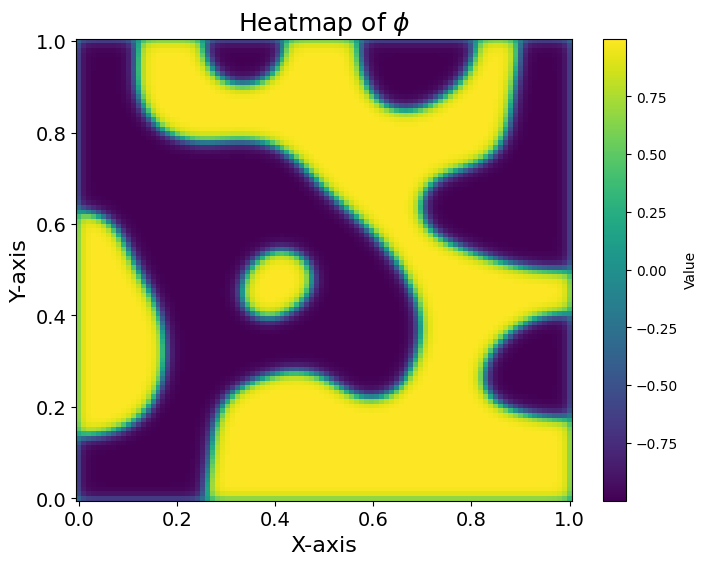

In [164]:
import matplotlib.pyplot as plt
import numpy as np

# Sample data for demonstration
# x, y = 1D arrays for axis values
# U = 2D array with values
var = 'tic-tac-toe'
ind = 0
for i in [0,15,28,-1]:
    U = uu[i].reshape(N,N)

    plt.figure(figsize=(8, 6))
    plt.pcolormesh(xx, yy, U, shading='auto', cmap='viridis')  # Shading 'auto' prevents visual artifacts
    plt.colorbar(label='Value')  # Add a color bar to show value scale
    plt.xlabel('X-axis',fontsize = 16)
    plt.ylabel('Y-axis',fontsize=16)
    plt.tick_params(axis='both', which='major', labelsize=14)
    plt.title(r'Heatmap of $\phi$',fontsize = 18)
    # plt.savefig(f'{var}_noise_{ind}.png')
    ind+=1



In [165]:
# Interpolate data to add more frames
num_original_frames = len(uu)
interpolation_factor = 1  # Number of extra frames between each original frame
num_frames = num_original_frames * interpolation_factor

uu_interp = []
for i in range(num_original_frames - 1):
    for t in np.linspace(0, 1, interpolation_factor, endpoint=False):
        U_interp = (1 - t) * uu[i] + t * uu[i + 1]
        uu_interp.append(U_interp)
uu_interp.append(uu[-1])  # Add the last frame

C:\Users\andyh\AppData\Local\Temp\ipykernel_25380\3674681304.py:11: UserWarning: shading value 'cubic' not in list of valid values ['gouraud', 'nearest', 'flat', 'auto']. Setting shading='auto'.
  cax = ax.pcolormesh(XX.reshape(N,N), YY.reshape(N,N), uu_interp[0].reshape(N,N), shading='cubic', cmap='plasma', vmin = -1, vmax = 1)


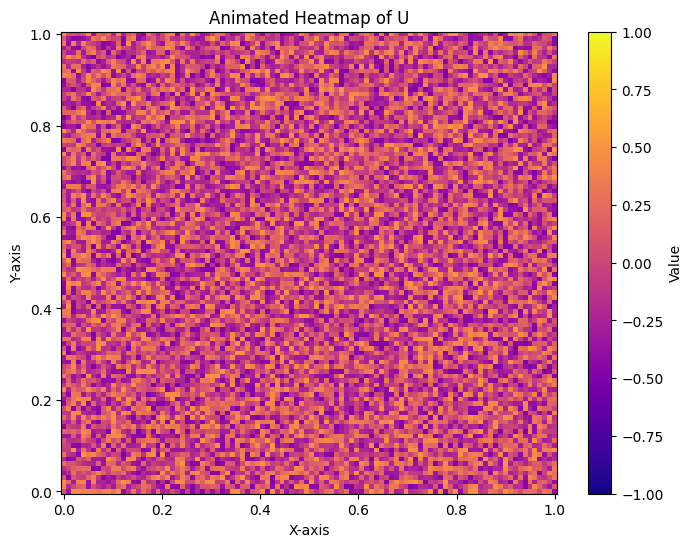

In [166]:
# Sample grid and initial data
import matplotlib.animation as animation

XX, YY = np.meshgrid(xx, yy)

# Generate random data for demonstration
# Replace this with your actual data generation or loading
frames = 60
astep = len(uu_interp)//frames
fig, ax = plt.subplots(figsize=(8, 6))
cax = ax.pcolormesh(XX.reshape(N,N), YY.reshape(N,N), uu_interp[0].reshape(N,N), shading='cubic', cmap='plasma', vmin = -1, vmax = 1)
fig.colorbar(cax, ax=ax, label='Value')
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.title('Animated Heatmap of U')

# Function to update the plot at each frame
def animate(i):
    cax.set_array(uu_interp[i*astep].ravel())  # Update the array for the current frame

# Create the animation
ani = animation.FuncAnimation(fig, animate, frames=frames, interval=100)  # Adjust interval for speed

# Save the animation as a video file (e.g., mp4) or display as a GIF
# ani.save('animated_heatmap.mp4', writer='ffmpeg', dpi=300)  # Save as MP4
# or display inline if using Jupyter Notebook
plt.show()
ani.save('animated_heatmap.gif', writer='pillow', dpi=80)


In [167]:
import pandas as pd

In [168]:
print(pd.DataFrame(uu[-1]).describe())
print((uu[-1]).flatten())
x = uu[-1].flatten()
print(len(x[x > .99])/len(x))
print(len(x[x < -.99])/len(x))

                  0
count  1.000000e+04
mean  -2.557954e-17
std    9.182701e-01
min   -1.000000e+00
25%   -9.924284e-01
50%    8.632969e-03
75%    9.925540e-01
max    9.999999e-01
[-0.3675203  -0.5561324  -0.62992957 ... -0.6298109  -0.55608444
 -0.36749906]
0.2739
0.2703


[ 0.   0.1  0.2  0.3  0.4  0.5  0.6  0.7  0.8  0.9  1.   1.1  1.2  1.3
  1.4  1.5  1.6  1.7  1.8  1.9  2.   2.1  2.2  2.3  2.4  2.5  2.6  2.7
  2.8  2.9  3.   3.1  3.2  3.3  3.4  3.5  3.6  3.7  3.8  3.9  4.   4.1
  4.2  4.3  4.4  4.5  4.6  4.7  4.8  4.9  5.   5.1  5.2  5.3  5.4  5.5
  5.6  5.7  5.8  5.9  6.   6.1  6.2  6.3  6.4  6.5  6.6  6.7  6.8  6.9
  7.   7.1  7.2  7.3  7.4  7.5  7.6  7.7  7.8  7.9  8.   8.1  8.2  8.3
  8.4  8.5  8.6  8.7  8.8  8.9  9.   9.1  9.2  9.3  9.4  9.5  9.6  9.7
  9.8  9.9 10.  10.1 10.2 10.3 10.4 10.5 10.6 10.7 10.8 10.9 11.  11.1
 11.2 11.3 11.4 11.5 11.6 11.7 11.8 11.9 12.  12.1 12.2 12.3 12.4 12.5
 12.6 12.7 12.8 12.9 13.  13.1 13.2 13.3 13.4 13.5 13.6 13.7 13.8 13.9
 14.  14.1 14.2 14.3 14.4 14.5 14.6 14.7 14.8 14.9 15.  15.1 15.2 15.3
 15.4 15.5 15.6 15.7 15.8 15.9 16.  16.1 16.2 16.3 16.4 16.5 16.6 16.7
 16.8 16.9 17.  17.1 17.2 17.3 17.4 17.5 17.6 17.7 17.8 17.9 18.  18.1
 18.2 18.3 18.4 18.5 18.6 18.7 18.8 18.9 19.  19.1 19.2 19.3 19.4 19.5
 19.6 

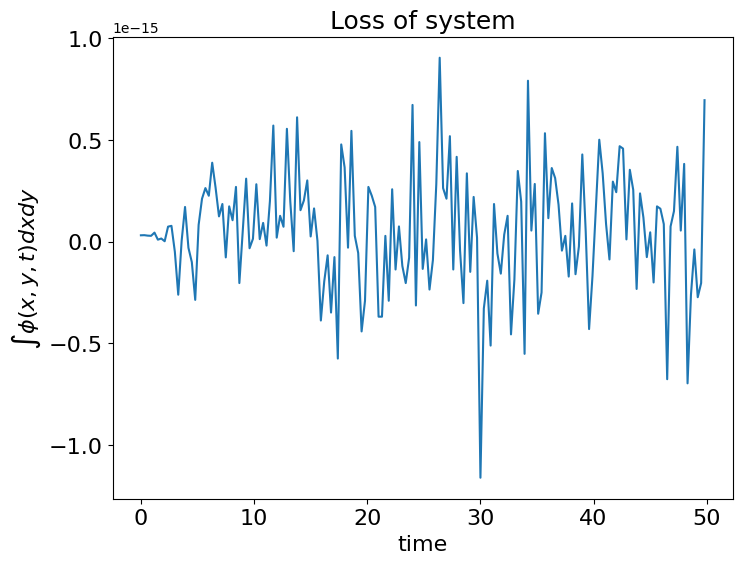

In [172]:
mass = [np.sum(uu[i])*dx*dy for i in range(len(uu))]
pltmass = [mass[i] for i in range(len(mass) ) if i % 3 == 0]
pltt = [tt[i] for i in range(len(tt) )if i % 3 == 0]
tt = np.round(tt,4)
print(tt)
print(mass)
print(len(uu))
fig,ax = plt.subplots(figsize=(8, 6))
ax.plot(pltt,pltmass)
ax.set_title('Loss of system',fontsize=18)
ax.set_xlabel('time',fontsize=16)
ax.set_ylabel(r'$\int \phi(x,y,t) dxdy$',fontsize=16)
ax.tick_params(axis='both', which='major', labelsize=16)